In [1]:
import os
os.chdir('..')

from vqshape.model import VQShape
from vqshape.pretrain import LitVQShape
from pytorch_lightning.utilities.model_summary import summarize
import torch
import torch.nn as nn

lit_model = LitVQShape.load_from_checkpoint("checkpoints/uea_dim512_codebook64/VQShape.ckpt", 'cuda')
model = lit_model.model
print(summarize(lit_model))

  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | VQShape | 37.1 M | train
------------------------------------------
37.1 M    Trainable params
0         Non-trainable params
37.1 M    Total params
148.339   Total estimated model params size (MB)
184       Modules in train mode
0         Modules in eval mode


Codebook shapes: (64, 128)


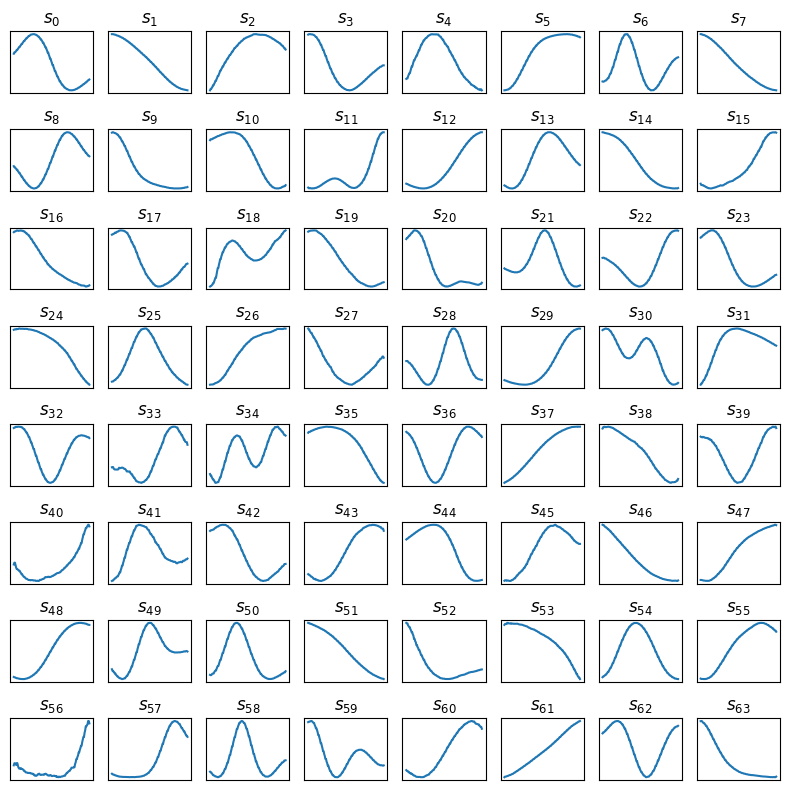

In [ ]:
import matplotlib.pyplot as plt
from einops import rearrange
import numpy as np

codebook = model.codebook.embedding.weight
decoder = model.shape_decoder

shapes, _, _ = decoder(codebook.unsqueeze(1))

shapes = shapes.squeeze(1).detach().cpu().numpy()
print("Codebook shapes:", shapes.shape)

shape_matrix = rearrange(shapes, '(N M) E -> N M E', N=8)

fig, ax = plt.subplots(8, 8, figsize=(8, 8))
counter = -1
for i in range(8):
    for j in range(8):
        counter += 1
        st = np.linspace(0, 1, 128)
        ax[i, j].plot(st, shape_matrix[i, j])
        # ax[i, j].axis('off')
        ax[i, j].set_title("$s_{" + str(counter) + "}$")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()

(64, 2)

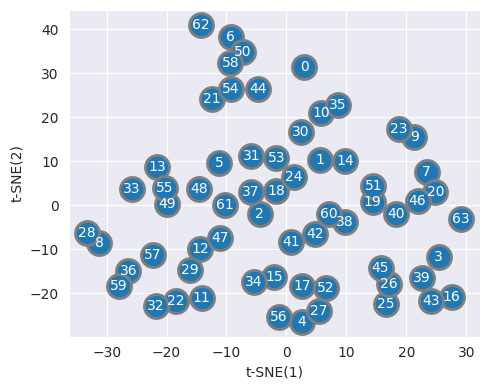

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

codes = codebook.detach().cpu().numpy()

code_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=6).fit_transform(codes)


with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(5,4))
    ax.scatter(code_tsne[:, 0], code_tsne[:, 1], s=300, edgecolor='tab:gray', linewidth=2)
    for i in range(code_tsne.shape[0]):
        ax.annotate(str(i), (code_tsne[i, 0], code_tsne[i, 1]), textcoords="offset points", xytext=(0,0), ha='center', va='center', color='white')
    ax.set_xlabel('t-SNE(1)')
    ax.set_ylabel('t-SNE(2)')
    plt.tight_layout()

code_tsne.shape